# Analysis of the ultrabroad source in field aa

The coordinates are roughly (ironically) 17:45:57.7530532310 -28:57:10.7694483833 ICRS.

## Detections

There are three confident (SNR > 10) lines detected (see [Fit lines](#Fit_lines)).

These are CS 2-1, SO 3(2)-2(1), SO 2(2)-1(1), and SO2 2(2,0)-3(1,3), in rough order of brightness (SO 32 may be brighter than CS 2-1).

No other lines are detected, and the H-bearing species appear to have restrictive upper limits (see [Overplot](# Overplot all the lines (to show nondetections)).

The pair of SO lines gives a temperature of roughly 15K.

The SO lines are optically thin, but at $\tau\sim0.1-0.2$, so it is not likely that the filling factor is small.  That puts the gas size at the source size, which is roughly 1".  The beam size is 1.5", but the source may be slightly resolved, giving a deconvolved size ~0.8".


In [611]:
from spectral_cube import SpectralCube
from astropy import units as u, constants
from astropy.coordinates import SkyCoord
import pyspeckit
import glob

In [919]:
from astropy import stats

In [633]:
from astropy.modeling.functional_models import Gaussian2D
from astropy.modeling.fitting import LevMarLSQFitter
import numpy as np
from astropy.table import Table

In [612]:
path = '/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/'

In [613]:
cd $path

/orange/adamginsburg/ACES/rawdata/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working


In [614]:
ls -d *image

uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw25.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw29.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw31.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw33.cube.I.iter1.reclean.image@
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw35.cube.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw25.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw27.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw29.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw31.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw33.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw35.mfs.I.iter1.image/


In [772]:
coord = SkyCoord("17:45:57.7530532310 -28:57:10.7694483833", unit=(u.h, u.deg), frame='icrs')
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.0246741, -0.0727428)>

In [861]:
imgs = sorted(glob.glob("*.cube.*.image"))

In [862]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cubes = [SpectralCube.read(fn) for fn in imgs]

In [863]:
pxcrd = [cube.wcs.celestial.world_to_pixel(coord) for cube in cubes]
spectra = [cube[:, int(y), int(x)].to(u.K) for cube, (x,y) in zip(cubes, pxcrd)]

In [864]:
pspectra = pyspeckit.Spectra([pyspeckit.Spectrum.from_hdu(sp.hdu) for sp in spectra])

INFO: Creating spectra [pyspeckit.spectrum.classes]
INFO: Concatenating data [pyspeckit.spectrum.classes]


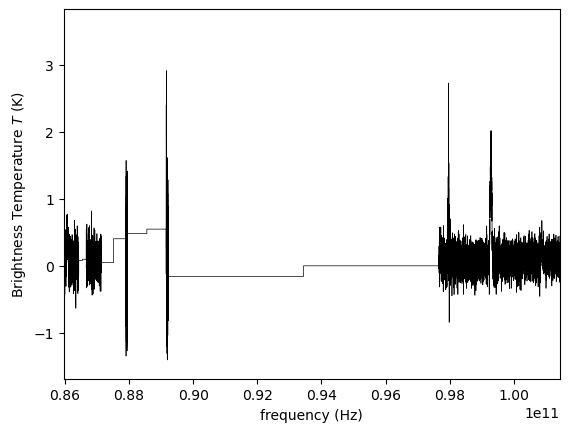

In [865]:
pspectra.plotter()

# Fit lines

In [866]:
from astroquery.splatalogue import Splatalogue
from astroquery.splatalogue.utils import minimize_table

In [867]:
#Splatalogue.query_lines(97.98095 * (1-30/3e5) *u.GHz, 97.98095 * (1+30/3e5)*u.GHz, energy_max=100, energy_type='eu_k')

In [868]:
nurest_so32 = 99.29987e9*u.Hz	
nurest_so21 = 86.09395e9*u.Hz
nurest_cs21 = 97.98095e9*u.Hz
nurest_so45 = 100.02956e9*u.Hz

### Table

In [869]:
measurement_table = []

### spw33 

In [870]:
# rough Jy to Kelvin estimate to change my guesses, that were in Jy, to K
JtoK = cubes[0].beam.jtok(cubes[0].spectral_axis).mean().value
JtoK

54.2808632681691

In [871]:
spw33.specfit.parinfo.errors

[0.027191415257185984,
 658258.2663633144,
 658258.2664445993,
 0.025017094889852164,
 381223.3294049301,
 381223.3296484108]

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.916434 +/-       0.0275603 
Param #1       SHIFT0 =  9.79603e+10 +/-          668082 
Param #2       WIDTH0 =  1.92385e+07 +/-          668082   Range:   [0,inf)
Param #3   AMPLITUDE1 =      1.71866 +/-       0.0253826 
Param #4       SHIFT1 =  9.92861e+10 +/-          386802 
Param #5       WIDTH1 =  2.26814e+07 +/-          386802   Range:   [0,inf) 
 Velocity width sigma(CS) = 58.87640739582237 km / s  FWHM(CS) =  138.3595573801826 km / s  VLSR(CS) =  63.2888385598767 km / s  SNR :  33.25192979447065 
 Velocity width sigma(SO) = 68.48604440164407 km / s  FWHM(SO) =  160.94220434386355 km / s  VLSR(SO) =  41.471029421557795 km / s  SNR :  67.7101076099218


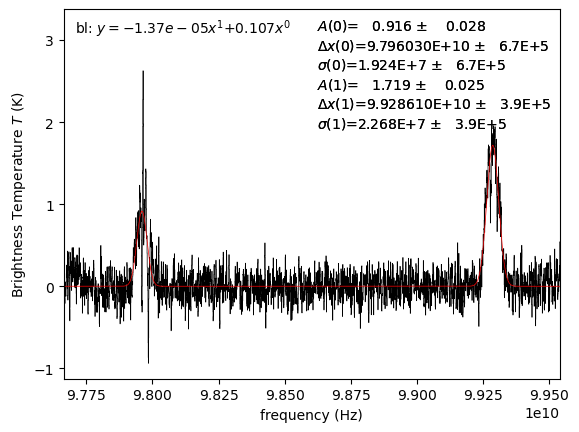

In [872]:
spw33 = pspectra[-2]
spw33.plotter()
spw33.specfit(guesses=[0.06*JtoK, 97.98e9, 97.8e9/3000, 0.06*JtoK, 99.3e9, 2e7])
spw33.baseline(excludefit=True)
spw33.specfit(guesses=[0.06*JtoK, 97.98e9, 97.8e9/3000, 0.06*JtoK, 99.3e9, 2e7])
measurement_table.append(['CS 2-1', 97.98095e9] + list(zip(spw33.specfit.parinfo.values[:3], spw33.specfit.parinfo.errors[:3])))
measurement_table.append(['SO 3(2)-2(1)', 99.2998e9] + list(zip(spw33.specfit.parinfo.values[3:6], spw33.specfit.parinfo.errors[3:6])))
                         
print(spw33.specfit.fitter.parinfo,
      "\n Velocity width sigma(CS) =",
      spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(CS) = ",
      2.35*spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(CS) = ",
      -(spw33.specfit.parinfo['SHIFT0'].value - 97.98095e9) / 97.98095e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw33.specfit.parinfo['AMPLITUDE0'].value / spw33.specfit.parinfo['AMPLITUDE0'].error,
      "\n Velocity width sigma(SO) =",
      spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value * constants.c.to(u.km/u.s),
      " FWHM(SO) = ",
      2.35*spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value * constants.c.to(u.km/u.s),
      " VLSR(SO) = ",
      -(spw33.specfit.parinfo['SHIFT1'].value - 99.2998e9) / 99.29987e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw33.specfit.parinfo['AMPLITUDE1'].value / spw33.specfit.parinfo['AMPLITUDE1'].error
     )

### spw25

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.382843 +/-       0.0261676 
Param #1       SHIFT0 =  8.60829e+10 +/-     1.53617e+06 
Param #2       WIDTH0 =  1.94643e+07 +/-     1.53617e+06   Range:   [0,inf) 
 Velocity width sigma(SO21) = 67.78625364381341 km / s  FWHM(SO) =  159.2976960629615 km / s  VLSR(SO2(2)-1(1)):  38.46949335873756 km / s  SNR :  14.630446711437804


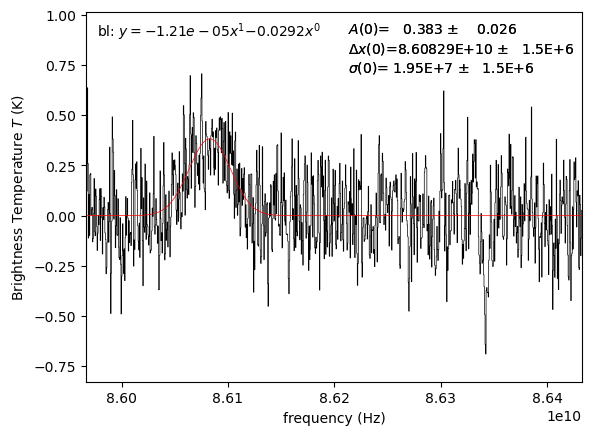

In [873]:
spw25 = pspectra[0]
spw25.data -= np.median(spw25.data) # contsub
spw25.plotter()
spw25.specfit(guesses=[0.06*JtoK, 86.09395e9, 2e7])
spw25.baseline(excludefit=True)
spw25.specfit(guesses=[0.06*JtoK, 86.09395e9, 2e7])
measurement_table.append(['SO 2(2)-1(1)', 86.09395e9] + list(zip(spw25.specfit.parinfo.values[:3], spw25.specfit.parinfo.errors[:3])))
print(spw25.specfit.fitter.parinfo,
      "\n Velocity width sigma(SO21) =",
      spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(SO) = ",
      2.35*spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(SO2(2)-1(1)): ",
      -(spw25.specfit.parinfo['SHIFT0'].value - 86.09395e9) / 86.09395e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw25.specfit.parinfo['AMPLITUDE0'].value / spw25.specfit.parinfo['AMPLITUDE0'].error
     )

### spw 35

In [874]:
nurest_so45

<Quantity 1.0002956e+11 Hz>

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.171514 +/-       0.0286755   Range:[0.05,2.71404]
Param #1       SHIFT0 =  1.00875e+11 +/-     4.79635e+06   Range:[1.008e+11,1.009e+11]
Param #2       WIDTH0 =  2.48427e+07 +/-     4.79635e+06   Range:[1.5e+07,4e+07]
Param #3   AMPLITUDE1 =    0.0583502 +/-       0.0301321   Range:[0.05,2.71404]
Param #4       SHIFT1 =  1.00017e+11 +/-     1.09545e+07   Range:[9.99962e+10,1.00063e+11]
Param #5       WIDTH1 =      1.5e+07 +/-               0   Range:[1.5e+07,4e+07] 
 Velocity width sigma(SO2 220) = 73.83054245480561 km / s  FWHM(SO2) =  173.50177476879318 km / s  VLSR(SO2):  9.873140266473737 km / s  SNR :  5.98120649752295


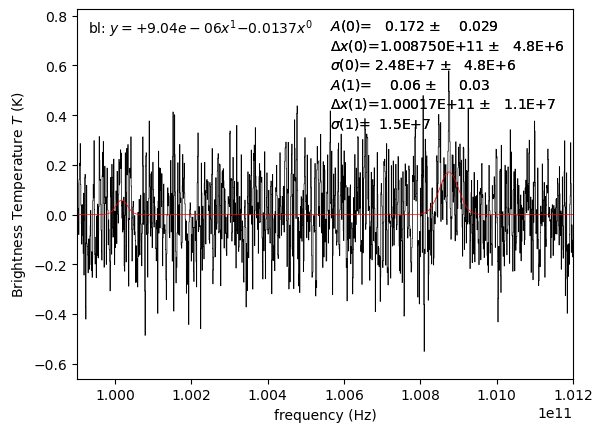

In [875]:
# Not a good fit

spw35 = pspectra[-1].copy()
spw35.data -= np.median(spw35.data) # contsub
spw35.plotter(xmin=99.9e9, xmax=101.2e9)
#spw35.plotter(xmin=100.55e9, xmax=101.2e9)
spw35.specfit(guesses=[0.006*JtoK, 100.878105e9, 1e7, 0.2, nurest_so45.to(u.Hz).value, 1e7],
              limits=[(0, 0.05*JtoK), (100.8e9, 100.9e9), (0, 4e7),
                      (0, 0.05*JtoK), (99.99e9, 100.2e9), (0, 4e7),
                     ], limited=[(True, True)]*6)
spw35.baseline(excludefit=True)
spw35.specfit(guesses=[0.006*JtoK, 100.878105e9, 2e7, 0.2, nurest_so45.to(u.Hz).value, 2e7],
              limits=[(0.05, 0.05*JtoK), (100.8e9, 100.9e9), (1.5e7, 4e7),
                      (0.05, 0.05*JtoK), (nurest_so45.value*(1-100/3e5), nurest_so45.value*(1+100/3e5)), (1.5e7, 4e7),
                     ], limited=[(True, True)]*6)
measurement_table.append(['SO2 2(2,0)-3(1,3)', 100.878105e9] + list(zip(spw35.specfit.parinfo.values[:3], spw35.specfit.parinfo.errors[:3])))
print(spw35.specfit.fitter.parinfo,
      "\n Velocity width sigma(SO2 220) =",
      spw35.specfit.parinfo['WIDTH0'].value/spw35.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(SO2) = ",
      2.35*spw35.specfit.parinfo['WIDTH0'].value/spw35.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(SO2): ",
      -(spw35.specfit.parinfo['SHIFT0'].value - 100.878105e9) / 100.878105e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw35.specfit.parinfo['AMPLITUDE0'].value / spw35.specfit.parinfo['AMPLITUDE0'].error
     )
#spw35.specfit.parinfo

In [1009]:
meastable = Table(list(zip(*measurement_table)),
      names=('Line', 'Rest Frequency', 'Amplitude / Error', 'Center / Error', 'Width / Error')
     )
vcen = (meastable['Rest Frequency'] - meastable['Center / Error'][:,0]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
evcen = (meastable['Center / Error'][:,1]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
width = (meastable['Width / Error'][:,0]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
ewidth = (meastable['Width / Error'][:,1]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
meastable.add_column(vcen, name="Velocity Center")
meastable.add_column(evcen, name="e_vcen")
meastable.add_column(width, name="Width (sigma)")
meastable.add_column(ewidth, name="e_width")

meastable['Rest Frequency'].unit = u.Hz
meastable['Amplitude / Error'].unit = u.K
meastable['Center / Error'].unit = u.Hz
meastable['Width / Error'].unit = u.Hz

meastable.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.ecsv', overwrite=True)
meastable.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.tex', overwrite=True)
meastable

Line,Rest Frequency,Amplitude / Error,Center / Error,Width / Error,Velocity Center,e_vcen,Width (sigma),e_width
,Hz,K,Hz,Hz,km / s,km / s,km / s,km / s
str17,float64,float64[2],float64[2],float64[2],float64,float64,float64,float64
CS 2-1,97980950000.0,0.9164335033604891 .. 0.027560310304542982,97960265355.13647 .. 668082.3583491397,19238470.94129326 .. 668082.3626368818,63.2888385598767,2.044132582465524,58.86397806565337,2.0441325955847347
SO 3(2)-2(1),99299800000.0,1.7186578692700587 .. 0.025382589541450052,99286063604.30212 .. 386801.6600878664,22681390.338607825 .. 386801.6571667506,41.4710586559778,1.1677789928702975,68.47657055168985,1.1677789840512616
SO 2(2)-1(1),86093950000.0,0.3828433591333181 .. 0.02616757824858611,86082902388.39613 .. 1536167.510134721,19464257.0217542 .. 1536167.4996166155,38.46949335873756,5.349173011146868,67.7775552834485,5.3491729745211964
"SO2 2(2,0)-3(1,3)",100878105000.0,0.1715140035002676 .. 0.028675486053072772,100874782756.04788 .. 4796354.934347436,24842652.749088455 .. 4796354.913773259,9.873140266473737,14.253945741828183,73.82811097501965,14.253945680685254


In [1010]:
cat /orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.tex

\begin{table}
\begin{tabular}{ccccccccc}
Line & Rest Frequency & Amplitude / Error & Center / Error & Width / Error & Velocity Center & e_vcen & Width (sigma) & e_width \\
 & $\mathrm{Hz}$ & $\mathrm{K}$ & $\mathrm{Hz}$ & $\mathrm{Hz}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ \\
CS 2-1 & 97980950000.0 & 0.9164335033604891 .. 0.027560310304542982 & 97960265355.13647 .. 668082.3583491397 & 19238470.94129326 .. 668082.3626368818 & 63.2888385598767 & 2.044132582465524 & 58.86397806565337 & 2.0441325955847347 \\
SO 3(2)-2(1) & 99299800000.0 & 1.7186578692700587 .. 0.025382589541450052 & 99286063604.30212 .. 386801.6600878664 & 22681390.338607825 .. 386801.6571667506 & 41.4710586559778 & 1.1677789928702975 & 68.47657055168985 & 1.1677789840512616 \\
SO 2(2)-1(1) & 86093950000.0 & 0.3828433591333181 .. 0.02616757824858611 & 86082902388.39613 .. 1536167.510134721 & 19464257.0217542 .. 1536167.4996166155 & 38.46949335873756 & 5.349173011146

# Search for spatial gradients

In [951]:
import regions

In [952]:
region = regions.RectangleSkyRegion(center=coord, width=15*u.arcsec, height=15*u.arcsec)

In [953]:
scubes = [cube.subcube_from_regions([region]) for cube in cubes]

In [954]:
# measure the surrounding ISM in an annulus
annulus = regions.CircleAnnulusSkyRegion(center=coord, inner_radius=3*u.arcsec, outer_radius=6*u.arcsec)

In [955]:
circle = regions.CircleSkyRegion(center=coord, radius=3*u.arcsec)

## Separate background

In [956]:
background_stddevs = [cube.subcube_from_regions([annulus]).std(axis=(1,2)) for cube in cubes]
background_means = [cube.subcube_from_regions([annulus]).mean(axis=(1,2)) for cube in cubes]

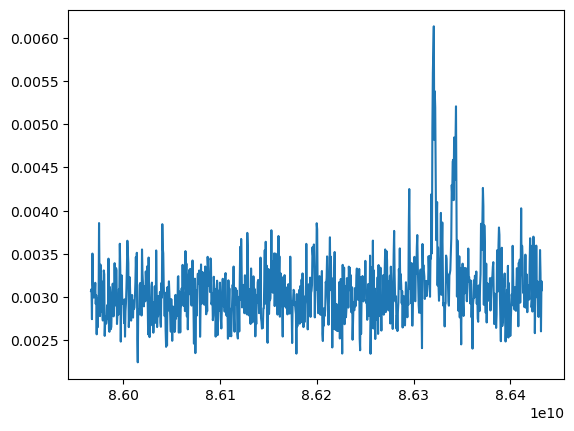

In [957]:
pl.plot(background_stddevs[0].spectral_axis, background_stddevs[0].value)

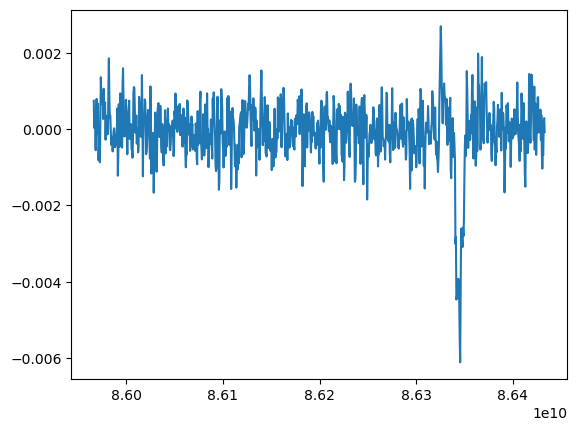

In [958]:
pl.plot(background_means[0].spectral_axis, background_means[0].value)

# Fit positions of moment maps

In [973]:
centroid_measurements = []

## SO first

In [974]:
so_scube = scubes[-2].with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=99.29987*u.GHz).spectral_slab(-300*u.km/u.s, 300*u.km/u.s)
so_scube

DaskSpectralCube with shape=(408, 58, 58) and unit=Jy / beam and chunk size (60, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:    408  type_s: VRAD      unit_s: km / s  range:     -300.055 km / s:     299.963 km / s

### Moment images

In [975]:
background_stddev_so = so_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_so = so_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_so_spec = so_scube.subcube_from_regions([circle]).mean(axis=(1,2))

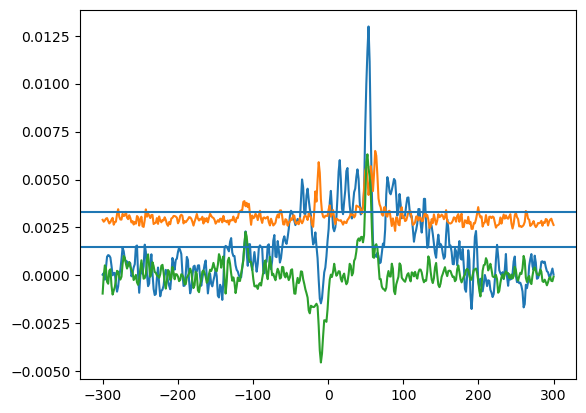

In [976]:
pl.plot(mean_so_spec.spectral_axis, mean_so_spec.value)
pl.plot(mean_so_spec.spectral_axis, background_stddev_so.value)
pl.plot(mean_so_spec.spectral_axis, background_mean_so.value)
pl.axhline(0.0033)
pl.axhline(0.0015)

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude           x_mean             y_mean            x_stddev          y_stddev            theta       
    ----------------- ------------------ ------------------ ------------------ ---------------- -------------------
    188.9390787323392 28.643610947266605 28.878972016682248 3.2036461439748396 2.78017149629542 0.29239145152311774


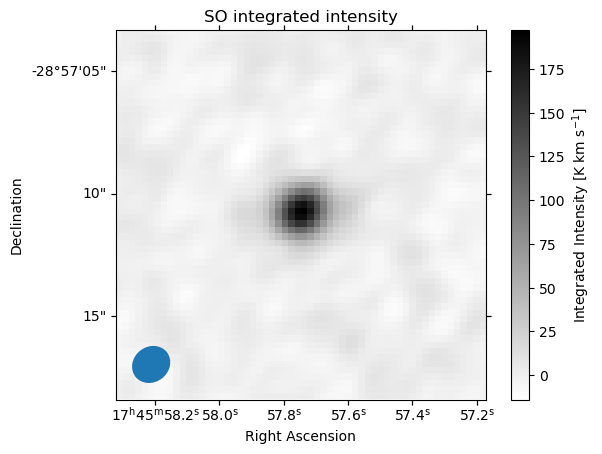

In [977]:
m0 = (so_scube.with_mask((background_stddev_so < 0.0033*background_stddev_so.unit)[:,None,None])
              .with_mask((mean_so_spec > 0.0015*mean_so_spec.unit)[:,None,None])).to(u.K).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("SO integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_m0.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
deconv_size = src.deconvolve(m0.beam)

centroid_measurements.append(['SO 3(2)-2(1)', 'm0', g.amplitude.value, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                              deconv_size.major, deconv_size.minor, deconv_size.pa
                             ])

m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_m0.fits', overwrite=True)

## Now CS

In [978]:
cs_scube = (scubes[-2]
            .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_cs21)
            .spectral_slab(-300*u.km/u.s, 300*u.km/u.s))
cs_scube

DaskSpectralCube with shape=(402, 58, 58) and unit=Jy / beam and chunk size (60, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:    402  type_s: VRAD      unit_s: km / s  range:     -299.573 km / s:     299.557 km / s

In [979]:
background_stddev_cs = cs_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_cs = cs_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_cs_spec = cs_scube.subcube_from_regions([circle]).mean(axis=(1,2))

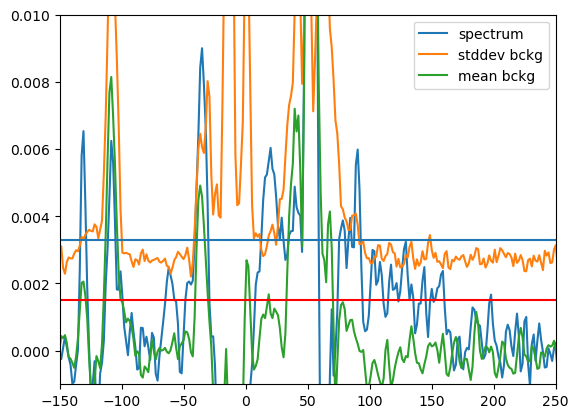

In [980]:
pl.plot(mean_cs_spec.spectral_axis, mean_cs_spec.value, label='spectrum')
pl.plot(mean_cs_spec.spectral_axis, background_stddev_cs.value, label='stddev bckg')
pl.plot(mean_cs_spec.spectral_axis, background_mean_cs.value, label='mean bckg')
pl.axhline(0.0033)
pl.axhline(0.0015, color='r')
pl.ylim(-0.001, 0.01)
pl.xlim(-150, 250)
pl.legend(loc='best');

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean             y_mean           x_stddev           y_stddev             theta       
    ----------------- ------------------- ----------------- ------------------ ------------------ -------------------
    11.93431960947797 -19.845094175232916 24.21368442890427 100.87562776754491 3.2469255818123517 0.09102317768082425


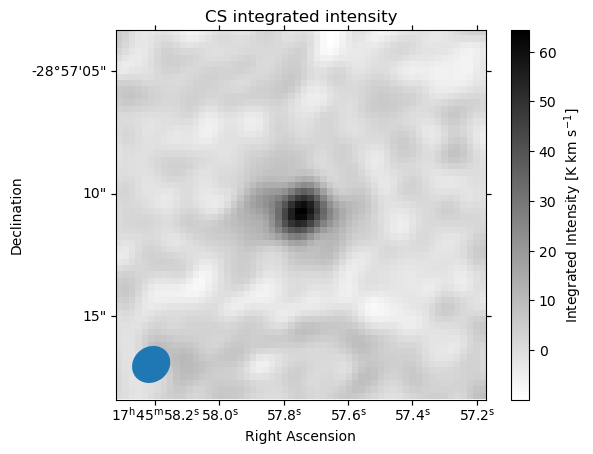

In [981]:
m0 = (cs_scube.with_mask((background_stddev_cs < 0.0033*background_stddev_cs.unit)[:,None,None])
              .with_mask((mean_cs_spec > 0.0010*mean_cs_spec.unit)[:,None,None])
              .spectral_slab(-150*u.km/u.s, 250*u.km/u.s)
     ).to(u.K).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("CS integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS32_m0.pdf', bbox_inches='tight')


g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:cs_scube.shape[1], :cs_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
deconv_size = src.deconvolve(m0.beam)

centroid_measurements.append(['CS 2-1', 'm0', g.amplitude.value, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                              deconv_size.major, deconv_size.minor, deconv_size.pa
                             ])


m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS32_m0.fits', overwrite=True)

## continuum

In [982]:
ls /orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/*spw33_35*cont*fits -d 

/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits*


In [983]:
from astropy.io import fits
from astropy.wcs import WCS

In [984]:
fn = "/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits"
fh = fits.open(fn)
contwcs = WCS(fh[0].header).celestial
preg = region.to_pixel(contwcs)
msk = preg.to_mask()
contim = msk.cutout(fh[0].data.squeeze());
beam = radio_beam.Beam.from_fits_header(fh[0].header)
contim = contim * beam.jtok(102*u.GHz).value

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean            y_mean           x_stddev          y_stddev             theta        
    ------------------ ------------------ ---------------- ----------------- ------------------ --------------------
    0.1035993267353875 29.103155173688595 29.0539155378385 2.825038328095847 2.4486689380830784 -0.08217934448721827


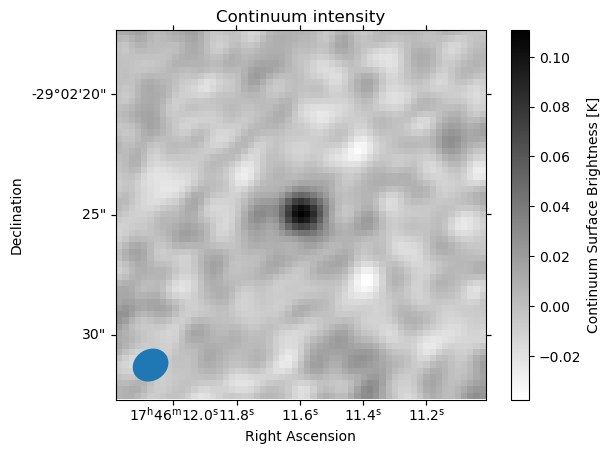

In [985]:
fig = pl.figure()
ax = pl.subplot(projection=contwcs)
im = ax.imshow(contim, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Continuum Surface Brightness [K]")
pixscale = contwcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("Continuum intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/continuum.pdf', bbox_inches='tight')


g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:contim.shape[0], :contim.shape[1]]
stddev = stats.mad_std(contim)
g = fit_g(g_init, x, y, z=contim, weights=1/stddev)
print(g)
cen = contwcs.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
deconv_size = src.deconvolve(beam)

centroid_measurements.append(['Continuum', 'spw33+35', g.amplitude.value, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                              deconv_size.major, deconv_size.minor, deconv_size.pa
                             ])


header = fh[0].header
header.update(contwcs.to_header())
fits.PrimaryHDU(data=contim, header=header).writeto('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cont_cutout.fits', overwrite=True)

### Make table

In [998]:
centrfittbl = Table((list(zip(*centroid_measurements))), names=['Image Data', 'Image Type', 'Amplitude', 'RA', 'Dec', 'Major', 'Minor', 'PA',
                                                  'Deconv Major', 'Deconv Minor', 'Deconv PA'])
centrfittbl.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.ecsv', overwrite=True)
centrfittbl.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.tex', overwrite=True)

## Fitting channel-by-channel

In [806]:
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.0246741, -0.0727428)>

In [634]:
#so_scube[chan, :, :]
chan

40

In [635]:
rows = []
for chan in range(so_scube.shape[0]):
    g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
    fit_g = LevMarLSQFitter()
    y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
    g = fit_g(g_init, x, y, z=so_scube[chan, :, :].value)
    rows.append(g.parameters)
    #print(chan, g.parameters)
tb = Table(np.array(rows), names=g.param_names)

amplitude,x_mean,y_mean,x_stddev,y_stddev,theta
float64,float64,float64,float64,float64,float64
0.005905585860934528,26.328576906592797,34.62835040278195,2.223591493629204,6.143321726898192,1.4044253533118467
0.0051844463456161205,31.643804508650515,32.155286780698,8.430427514228322,1.617510322407969,-0.19444014117558736
0.005680080658306295,32.37743393773512,30.79586320983435,6.201328799229736,1.8372987093384185,0.01925491221517151
0.004466647678453937,34.49168760886746,28.42773038878257,6.863433086440286,1.6633525742944029,-0.41298774500885754
0.0026836125945029453,29.199514876698476,28.43392904383554,2.8346325397063814,1.1754943508222875e-38,-0.4846850113170254
0.0021286195737177833,29.669661772152843,24.388187229793648,1.4153751884510877,1.1754943508222875e-38,-0.02069692356870769
-0.0013055802129225426,28.703801048226392,22.764780298104306,3.589776841664849,1.1754943508222875e-38,-0.009950217987713233
0.0026761589337948545,23.191125618972922,30.54714951389411,6.259404232251199,1.4011830145973465,-0.1263525824965948
0.006269812709827055,34.92395995124469,31.176221997470012,4.516466183308611,1.454413298532732,0.36178613243530244


In [636]:
%matplotlib inline
import pylab as pl

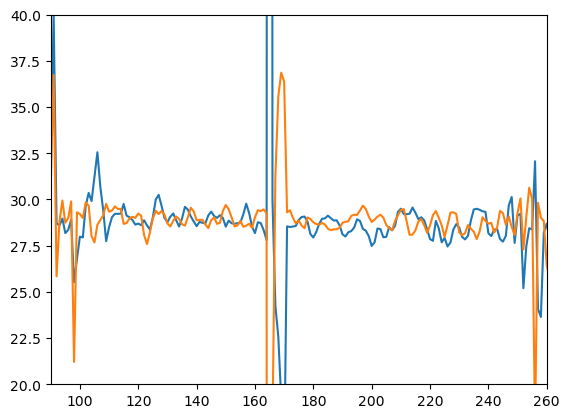

In [637]:
pl.plot(tb['x_mean'])
pl.plot(tb['y_mean'])
pl.ylim(20, 40);
pl.xlim(90,260);

(-0.01, 0.05)

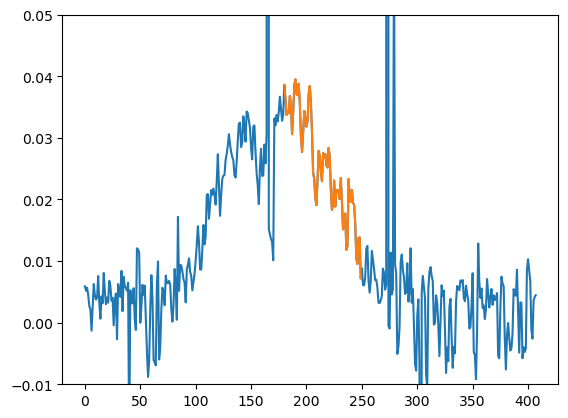

In [754]:
pl.plot(tb['amplitude'])
pl.plot(np.arange(len(tb))[180:250], tb['amplitude'][180:250])
pl.ylim([-0.01, 0.05])

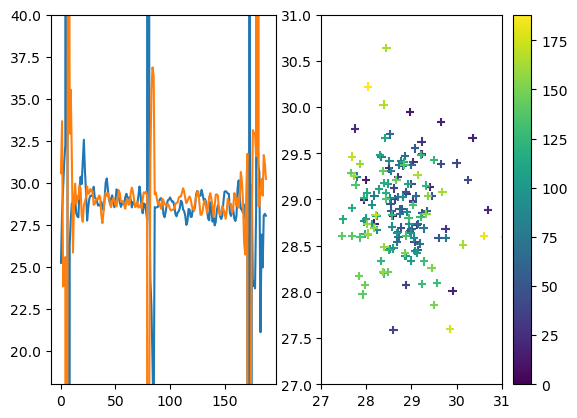

In [639]:
sel = tb['amplitude'] > 0.008
pl.subplot(1,2,1)
pl.plot(tb['x_mean'][sel])
pl.plot(tb['y_mean'][sel])
pl.ylim(18, 40);
pl.subplot(1,2,2)
pl.scatter(tb['x_mean'][sel], tb['y_mean'][sel], c=np.arange(len(tb[sel])), marker='+')
pl.colorbar()
pl.axis([27,31,27,31]);

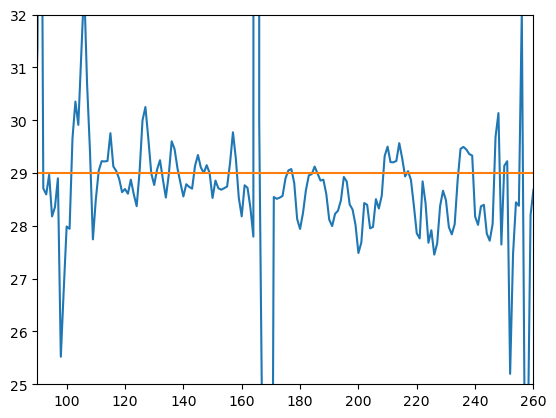

In [640]:
pl.plot(tb['x_mean'])
pl.plot([0,400], [29, 29])
pl.ylim(25, 32);
pl.xlim(90,260);

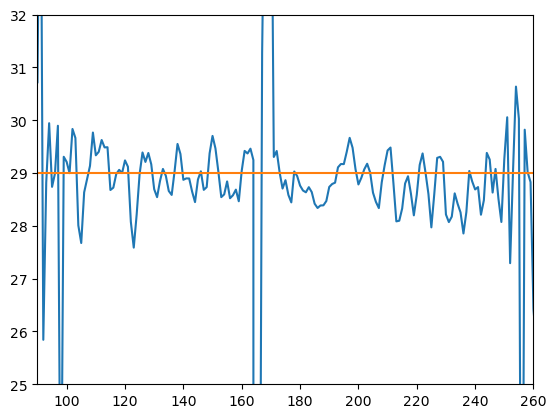

In [641]:
pl.plot(tb['y_mean'])
pl.plot([0,400], [29, 29])
pl.ylim(25, 32);
pl.xlim(90,260);

In [748]:
scube.beam

Beam: BMAJ=1.6255785371840412 arcsec BMIN=1.4396964064791222 arcsec BPA=-52.087786316534505 deg

In [747]:
pixscale = scube.wcs.celestial.proj_plane_pixel_scales()[0].to(u.arcsec)
pixscale

<Quantity 0.26 arcsec>

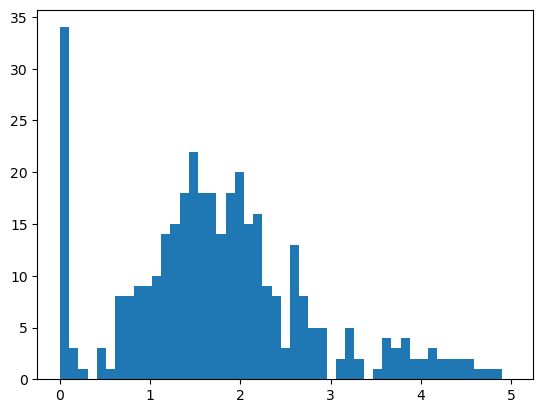

In [751]:
pl.hist(tb['x_stddev']*pixscale.value*2.35, bins=np.linspace(0,5));

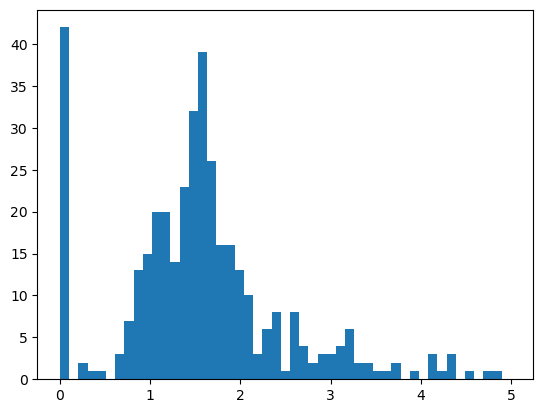

In [752]:
pl.hist(tb['y_stddev']*pixscale.value*2.35, bins=np.linspace(0,5));

(<Quantity 1.75846813 arcsec>,
 <Quantity 1.58360147 arcsec>,
 <Gaussian2D(amplitude=0.02563195, x_mean=28.54175745, y_mean=28.78748886, x_stddev=2.87801657, y_stddev=2.5918191, theta=0.17038562)>)

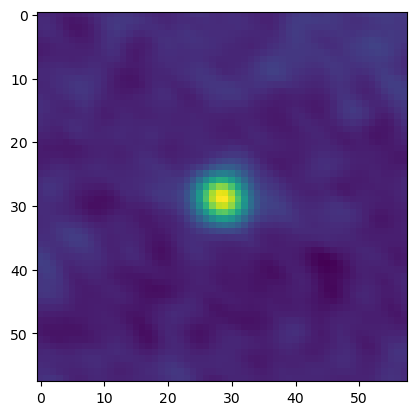

In [782]:
avgim = so_scube[180:250].mean(axis=0)
avgim.quicklook()
g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
g = fit_g(g_init, x, y, z=avgim.value)
g.x_stddev * pixscale * 2.35, g.y_stddev * pixscale * 2.35, g

In [786]:
coord_fit = so_scube.wcs.celestial.pixel_to_world(g.x_mean, g.y_mean)
coord_fit, coord_fit.to_string('hmsdms'), coord_fit.galactic

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.49060723, -28.95299327)>,
 '17h45m57.74573513s -28d57m10.77577293s',
 <SkyCoord (Galactic): (l, b) in deg
     (0.02465872, -0.07272093)>)

In [769]:
import radio_beam
# wouldn't deconvolve with theta as set; rotated 90 deg (probably not right?)
src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
src, so_scube.beam, src.deconvolve(so_scube.beam)

(Beam: BMAJ=1.7584681250090228 arcsec BMIN=1.5836014702261407 arcsec BPA=99.76237710482135 deg,
 Beam: BMAJ=1.6255785371840412 arcsec BMIN=1.4396964064791222 arcsec BPA=-52.087786316534505 deg,
 Beam: BMAJ=0.8454143787624522 arcsec BMIN=0.4123675156659957 arcsec BPA=69.51613180241908 deg)

### Source fit leads to 1.5" size scale (so, beam-sized) - but it can deconvolve to ~0.8"

### Try again downsampled (higher S/N)

In [642]:
so_scube_ds = so_scube.downsample_axis(factor=10, axis=0)
so_scube_ds

In some cases, the final shape of the output from downsample_axis is incorrect, so use the result with caution


DaskSpectralCube with shape=(41, 58, 58) and unit=Jy / beam and chunk size (6, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:     41  type_s: VRAD      unit_s: km / s  range:     -296.369 km / s:     293.329 km / s

In [643]:
rows = []
for chan in range(so_scube_ds.shape[0]):
    g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
    fit_g = LevMarLSQFitter()
    y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
    g = fit_g(g_init, x, y, z=so_scube[chan, :, :].value)
    rows.append(g.parameters)
    #print(chan, g.parameters)
tb2 = Table(np.array(rows), names=g.param_names)
tb2

amplitude,x_mean,y_mean,x_stddev,y_stddev,theta
float64,float64,float64,float64,float64,float64
0.005905585860934528,26.328576906592797,34.62835040278195,2.223591493629204,6.143321726898192,1.4044253533118467
0.0051844463456161205,31.643804508650515,32.155286780698,8.430427514228322,1.617510322407969,-0.19444014117558736
0.005680080658306295,32.37743393773512,30.79586320983435,6.201328799229736,1.8372987093384185,0.01925491221517151
0.004466647678453937,34.49168760886746,28.42773038878257,6.863433086440286,1.6633525742944029,-0.41298774500885754
0.0026836125945029453,29.199514876698476,28.43392904383554,2.8346325397063814,1.1754943508222875e-38,-0.4846850113170254
0.0021286195737177833,29.669661772152843,24.388187229793648,1.4153751884510877,1.1754943508222875e-38,-0.02069692356870769
-0.0013055802129225426,28.703801048226392,22.764780298104306,3.589776841664849,1.1754943508222875e-38,-0.009950217987713233
0.0026761589337948545,23.191125618972922,30.54714951389411,6.259404232251199,1.4011830145973465,-0.1263525824965948
0.006269812709827055,34.92395995124469,31.176221997470012,4.516466183308611,1.454413298532732,0.36178613243530244


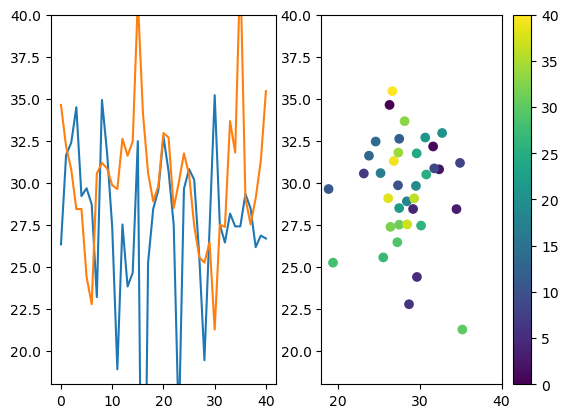

In [644]:
pl.subplot(1,2,1)
pl.plot(tb2['x_mean'])
pl.plot(tb2['y_mean'])
pl.ylim(18, 40);
pl.subplot(1,2,2)
pl.scatter(tb2['x_mean'], tb2['y_mean'], c=np.arange(len(tb2)))
pl.colorbar()
pl.axis([18,40,18,40]);

# model SO

In [679]:
from pyspeckit.spectrum.models import lte_molecule
from astroquery.linelists.cdms import CDMS
from astroquery.jplspec import JPLSpec
cdmstbl = CDMS.get_species_table()

In [680]:
cdmstbl[np.core.defchararray.find(cdmstbl['molecule'], 'SO') != -1]

tag,molecule,#lines,lg(Q(1000)),lg(Q(500)),lg(Q(300)),lg(Q(225)),lg(Q(150)),lg(Q(75)),lg(Q(37.5)),lg(Q(18.75)),lg(Q(9.375)),lg(Q(5.000)),lg(Q(2.725))
int64,str24,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
48501,"SO, v=0",449,nan,nan,2.9295,2.8009,2.6175,2.2956,1.9559,1.5897,1.2015,0.8698,0.6058
48502,"SO, v=1",245,nan,nan,2.9295,2.8009,2.6175,2.2956,1.9559,1.5897,1.2015,nan,nan
48504,"SO-sgl-D, v0,1",80,nan,nan,2.4708,2.3441,2.1678,1.8677,1.5686,1.2715,0.9784,nan,nan
49502,SO-17,2380,nan,nan,3.725,3.5962,3.4128,3.0906,2.7504,2.3831,1.9932,1.6596,1.3939
49512,HSO,6815,nan,nan,4.0112,3.8237,3.5595,3.1085,2.6586,2.2106,1.7676,1.3968,1.1146
50502,SO-18,359,nan,nan,2.9627,2.8339,2.6504,2.328,1.9873,1.6191,1.2276,0.8923,0.6252
64502,"SO2, v=0",14754,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,1.1157,0.7309
64503,"SO2, v2=1",9808,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,nan,nan
64512,"SO2, nu2",7603,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,nan,nan


In [681]:
scubes[0].find_lines(velocity_offset=40*u.km/u.s, velocity_convention='radio', rest_value=90*u.GHz, chemical_name='SO')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str13,str15,float64,float64,float64,float64,str17,float64,float64,float64,float64,str4,float64,float64,float64,float64,str5
34SO2v=0,Sulfur Dioxide,85.972404,1.7e-05,--,--,"33(3,31)-32(4,28)",0.0,4.65259,1.7446,-6.28936,--,368.051,530.30844,370.91873,534.44043,SLAIM
34SO2v=0,Sulfur Dioxide,85.972412,4.6e-06,--,--,"33(3,31)-32(4,28)",-5.1895,4.65701,1.746,-6.28896,--,368.051,530.30844,370.91873,534.44043,CDMS
34SO2v=0,Sulfur Dioxide,85.9724123,4.6e-06,--,--,"33(3,31)-32(4,28)",-5.1895,4.65701,1.746,-6.28896,--,368.051,530.30844,370.91873,534.44043,JPL
SO2v2=2,Sulfur Dioxide,86.005572,0.000682,--,--,"41(9,33)-42(8,34)",0.0,16.73607,6.3838,-5.8259,--,691.418,1047.57007,694.28684,1051.91665,SLAIM
SO3&Sigma;v=0,Sulfur Monoxide,--,--,86.09395,0.0001,2(2)-1(1),-3.7129,3.534,1.5,-5.27985,<1.7,10.552,15.18189,13.42379,19.31372,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,--,--,86.09395,0.0001,2(2)-1(1),-3.7043,3.60443,1.5,-5.27128,<1.7,10.552,15.18189,13.42379,19.31372,JPL
SO3&Sigma;v=0,Sulfur Monoxide,86.093983,4e-06,--,--,2(2)-1(1),0.0,0.0,0.0,0.0,<1.7,0.0,0.0,0.0,0.0,Lovas
SO3&Sigma;v=0,Sulfur Monoxide,86.093983,4e-06,86.09395,1e-05,2(2)-1(1),0.0,0.0,0.0,0.0,--,10.552,15.18189,13.42379,19.31372,SLAIM
SO2v=0,Sulfur dioxide,--,--,86.1537638,2e-06,"39(9,31)-40(8,32)",-5.2343,15.91179,5.966,-5.82415,--,633.8571,911.97373,636.73088,916.10844,CDMS


In [682]:
scubes[-2].find_lines(velocity_offset=40*u.km/u.s, velocity_convention='radio', rest_value=90*u.GHz, chemical_name=' SO ')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str13,str15,float64,float64,float64,float64,str9,float64,float64,float64,float64,str5,float64,float64,float64,float64,str5
SO3&Sigma;v=1,Sulfur Monoxide,98.3175545,2.72e-05,--,--,4(5)-4(4),-6.5642,0.8394,0.356,-5.98645,--,1134.9339,1632.90733,1138.21342,1637.6258,CDMS
SO3&Sigma;v=1,Sulfur Monoxide,98.317606,2.9e-05,--,--,4(5)-4(4),0.0,0.0,0.0,0.0,--,23.434,33.7161,26.71352,38.43458,SLAIM
SO3&Sigma;v=1,Sulfur Monoxide,98.3180964,0.0015506,--,--,4(5)-4(4),-6.5556,0.85613,0.356,-5.97787,--,1134.9344,1632.90805,1138.21394,1637.62654,JPL
SO3&Sigma;v=1,Sulfur Monoxide,98.7580084,0.0010452,--,--,3(2)-2(1),-5.5937,7.0502,2.935,-4.94725,--,1114.5902,1603.63745,1117.88441,1608.37706,JPL
SO3&Sigma;v=1,Sulfur Monoxide,--,--,98.758182,8e-05,3(2)-2(1),-5.6022,6.914,2.934,-4.95572,--,1114.5902,1603.63745,1117.88442,1608.37707,CDMS
SO3&Sigma;v=1,Sulfur Monoxide,98.758192,3.3e-05,98.75818,8e-06,3(2)-2(1),0.0,0.0,0.0,0.0,--,3.09,4.4458,6.38422,9.18541,SLAIM
SO3&Sigma;v=0,Sulfur Monoxide,--,--,99.29987,0.0001,3(2)-2(1),-3.2826,6.91115,2.933,-4.94877,1.59m,3.0999,4.46004,6.41219,9.22565,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,--,--,99.29987,0.0001,3(2)-2(1),-3.274,7.04889,2.934,-4.9402,1.59m,3.0999,4.46004,6.41219,9.22565,JPL
SO3&Sigma;v=0,Sulfur Monoxide,99.299905,1.4e-05,--,--,3(2)-2(1),0.0,0.0,0.0,0.0,1.59m,0.0,0.0,0.0,0.0,Lovas


In [683]:
freqs, aij, deg, EU, partfunc = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=48501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [684]:
freqs_SO, aij_SO, deg_SO, EU_SO, partfunc_SO = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=48501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [685]:
freqs_SO2, aij_SO2, deg_SO2, EU_SO2, partfunc_SO2 = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=64502,
                                                                      catalog='CDMS', parse_name_locally=False)

In [686]:
freqs_CS, aij_CS, deg_CS, EU_CS, partfunc_CS = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=44501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [687]:
freqs_34SO, aij_34SO, deg_34SO, EU_34SO, partfunc_34SO = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=50501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [688]:
freqs_CH3SH, aij_CH3SH, deg_CH3SH, EU_CH3SH, partfunc_CH3SH = lte_molecule.get_molecular_parameters(molecule_name=None,
                                                                                                    molecule_tag=48510,
                                                                      catalog='CDMS', parse_name_locally=False)

## Simple rotational diagram

In [689]:
integ_so32 = (spw33.specfit.parinfo['AMPLITUDE1'].value *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
err_so32 = (spw33.specfit.parinfo['AMPLITUDE0'].error *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO3221 = np.argmin(np.abs(spw33.specfit.parinfo['SHIFT1'].value*u.Hz - freqs_SO))
Aul_SO3221 = 10**aij_SO[ind_SO3221]
nup_so32 = lte_molecule.nupper_of_kkms(integ_so32, nurest_so32, Aul_SO3221)
nup_so32, err_so32, integ_so32

(<Quantity 5.02579173e+14 1 / cm2>,
 <Quantity 4.06738553 K km / s>,
 <Quantity 295.04037283 K km / s>)

In [690]:
integ_cs21 = (spw33.specfit.parinfo['AMPLITUDE0'].value *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
Aul_CS21 = 10**aij_CS[np.argmin(np.abs(spw33.specfit.parinfo['SHIFT0'].value*u.Hz - freqs_CS))]
nup_cs21 = lte_molecule.nupper_of_kkms(integ_cs21, nurest_cs21, Aul_CS21)
nup_cs21, integ_cs21

(<Quantity 1.50286103e+14 1 / cm2>, <Quantity 135.24841799 K km / s>)

In [691]:
integ_so22 = (spw25.specfit.parinfo['AMPLITUDE0'].value *
              (2 * np.pi)**0.5 * (spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
# approximate error as dominated by amplitude...
err_so22 = (spw25.specfit.parinfo['AMPLITUDE0'].error *
              (2 * np.pi)**0.5 * (spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO2211 = np.argmin(np.abs(spw25.specfit.parinfo['SHIFT0'].value*u.Hz - freqs_SO))
Aul_SO2211 = 10**aij_SO[ind_SO2211]
nup_so22 = lte_molecule.nupper_of_kkms(integ_so22, nurest_so21, Aul_SO2211)
integ_so22, err_so22, nup_so22

(<Quantity 65.0508064 K km / s>,
 <Quantity 4.44626249 K km / s>,
 <Quantity 1.7852825e+14 1 / cm2>)

In [692]:
# SO is a nondetection
integ_so45 = (spw35.specfit.parinfo['AMPLITUDE1'].value *
              (2 * np.pi)**0.5 * (spw35.specfit.parinfo['WIDTH1'].value/spw35.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
# approximate error as dominated by amplitude...
err_so45 = (spw35.specfit.parinfo['AMPLITUDE1'].error *
              (2 * np.pi)**0.5 * (spw35.specfit.parinfo['WIDTH1'].value/spw35.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO4544 = np.argmin(np.abs(spw35.specfit.parinfo['SHIFT1'].value*u.Hz - freqs_SO))
Aul_SO4544 = 10**aij_SO[ind_SO4544]
nup_so45 = lte_molecule.nupper_of_kkms(integ_so45, nurest_so21, Aul_SO4544)
integ_so45, err_so45,  nup_so45

(<Quantity 6.57611751 K km / s>,
 <Quantity 3.39591632 K km / s>,
 <Quantity 8.7526554e+13 1 / cm2>)

In [693]:
[ind_SO3221, ind_SO2211]
EU_SO[[ind_SO3221, ind_SO2211]]
deg_SO[[ind_SO3221, ind_SO2211]]

array([7, 5])

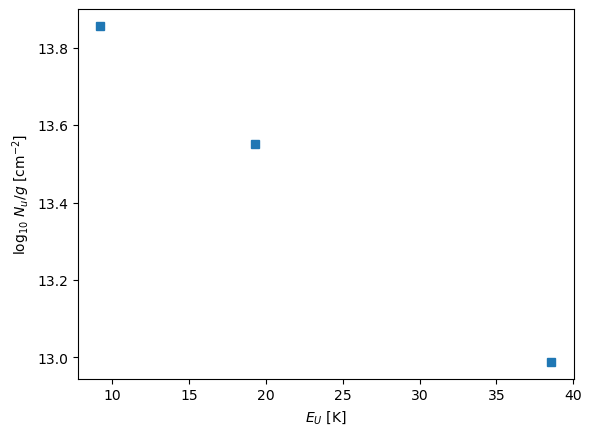

In [694]:
pl.plot((EU_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]*u.erg / constants.k_B).decompose(),
        np.log10((u.Quantity([nup_so32, nup_so22, nup_so45]) / deg_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]).value),
        's')
pl.ylabel("log$_{10}$ $N_u / g$ [cm$^{-2}$]")
pl.xlabel("$E_U$ [K]");

In [695]:
from astropy import modeling
from astropy.modeling.models import custom_model

@custom_model
def model(eupper, logcolumn=np.log(1e13), tem=20):
    """
    Calculate the quantity N_u/g_u as a function of E_u in Kelvin

    The 'logcolumn' quantity is N_tot / Q_tot

    Temperature is the excitation temperature
    """

    result = -1/tem * eupper + logcolumn

    return result
fitter = modeling.fitting.LevMarLSQFitter()

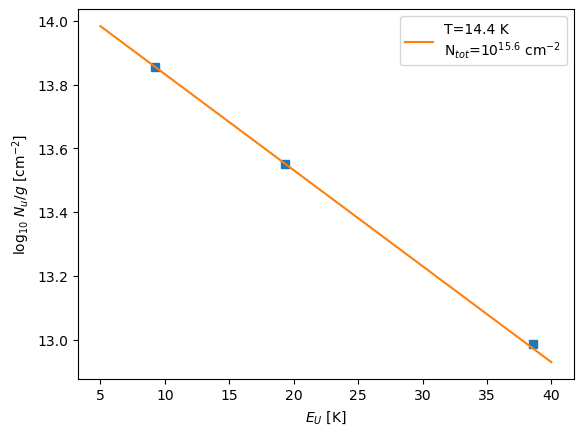

In [720]:
xvals = (EU_SO[[ind_SO3221, ind_SO2211,]]*u.erg / constants.k_B).decompose().value
yvals = np.log((u.Quantity([nup_so32, nup_so22]) / deg_SO[[ind_SO3221, ind_SO2211]]).value)
rslt = fitter(model(), xvals, yvals)

# plot 4544 but don't include in fit
xvals = (EU_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]*u.erg / constants.k_B).decompose().value
yvals = np.log((u.Quantity([nup_so32, nup_so22, nup_so45]) / deg_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]).value)
pl.plot(xvals,
        yvals * np.log10(np.exp(1)),
        's')
pl.plot(np.linspace(5, 40), rslt(np.linspace(5, 40)) * np.log10(np.exp(1)),
        label=f'T={rslt.tem.value:0.1f} K\n'
              f'N$_{{tot}}$=$10^{{{np.log10(np.exp(rslt.logcolumn.value)*partfunc_SO(rslt.tem)):0.1f}}} $ cm$^{{-2}}$'
        )
pl.ylabel("log$_{10}$ $N_u / g$ [cm$^{-2}$]")
pl.xlabel("$E_U$ [K]");
pl.legend(loc='best');

In [721]:
log10col_SO = np.log10(np.exp(rslt.logcolumn.value)*partfunc_SO(rslt.tem))
log10col_SO

15.585639581194684

## Model SO and CS

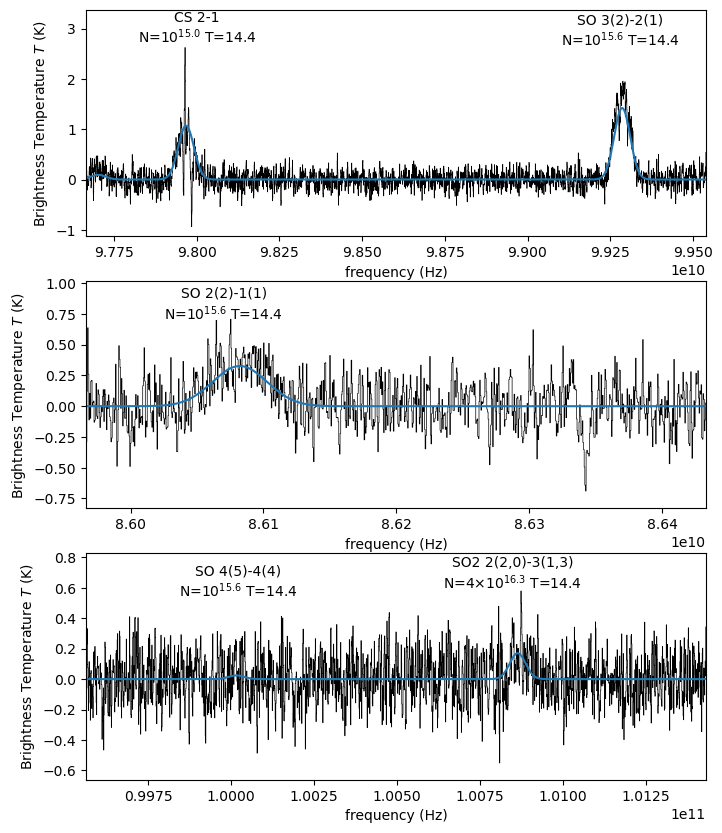

In [722]:
tex = rslt.tem * u.K
column_SO = (10**log10col_SO)*u.cm**-2
column_SO2 = 2e16*u.cm**-2
column_34SO = column_SO/16
column_CS = 1e15*u.cm**-2
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 10))
spw33.plotter(axis=pl.subplot(3,1,1))
spw33.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 0.050*JtoK, f"CS 2-1\nN=$10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 0.049*JtoK, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25.plotter(axis=pl.subplot(3,1,2))
spw25.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.07e9, 0.013*JtoK, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             )
spw35.plotter(axis=pl.subplot(3,1,3))
spw35.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.010*JtoK, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.011*JtoK, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');

### Check optical depth

Text(0.5, 1.0, 'optical depth of the models in spw33')

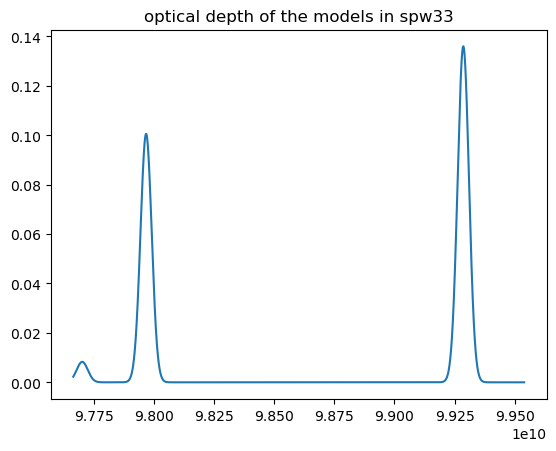

In [723]:
taus = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO, get_tau=True) + 
        lte_molecule.generate_model(spw33.xarr,
                      41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                      freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO, get_tau=True) + 
        lte_molecule.generate_model(spw33.xarr,
                      41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                      freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS, get_tau=True))
pl.plot(spw33.xarr, taus)
pl.title("optical depth of the models in spw33")

### Smooth version

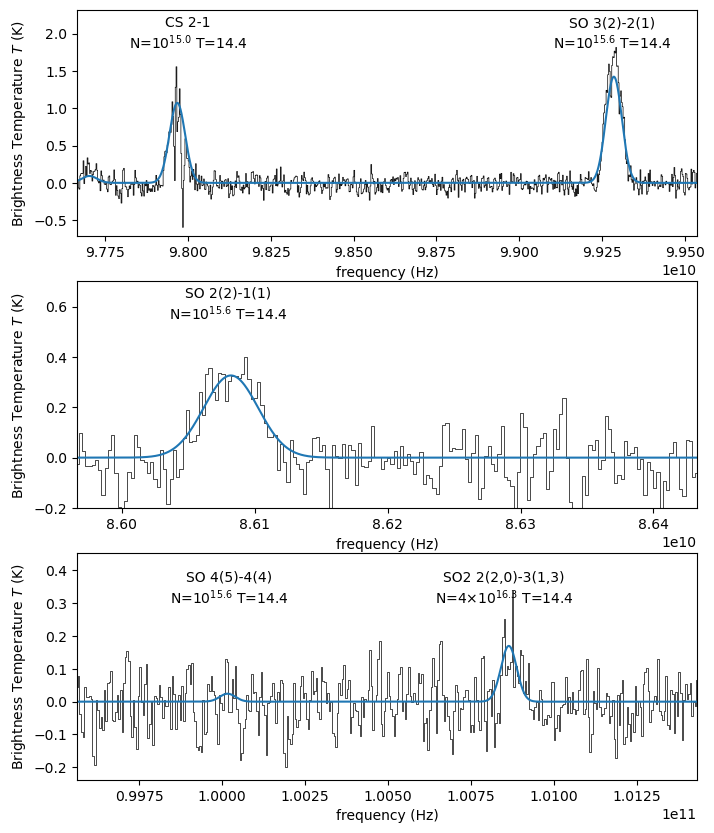

In [724]:
# smooth version, with contsub
spw33sm = spw33.copy()
spw33sm.smooth(5)
spw33sm.data -= np.median(spw33sm.data)
spw35sm = spw35.copy()
spw35sm.smooth(5)
spw35sm.data -= np.median(spw35sm.data)
spw25sm = spw25.copy()
spw25sm.smooth(5)
spw25sm.data -= np.median(spw25sm.data)

sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 10))
spw33sm.plotter(axis=pl.subplot(3,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 1.8, f"CS 2-1\nN=$10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 1.8, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter(axis=pl.subplot(3,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.08e9, 0.55, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter.axis.set_ylim(-0.2, 0.7)

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             )
spw35sm.plotter(axis=pl.subplot(3,1,3))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.3, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.3, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');

## Test filling factor limits

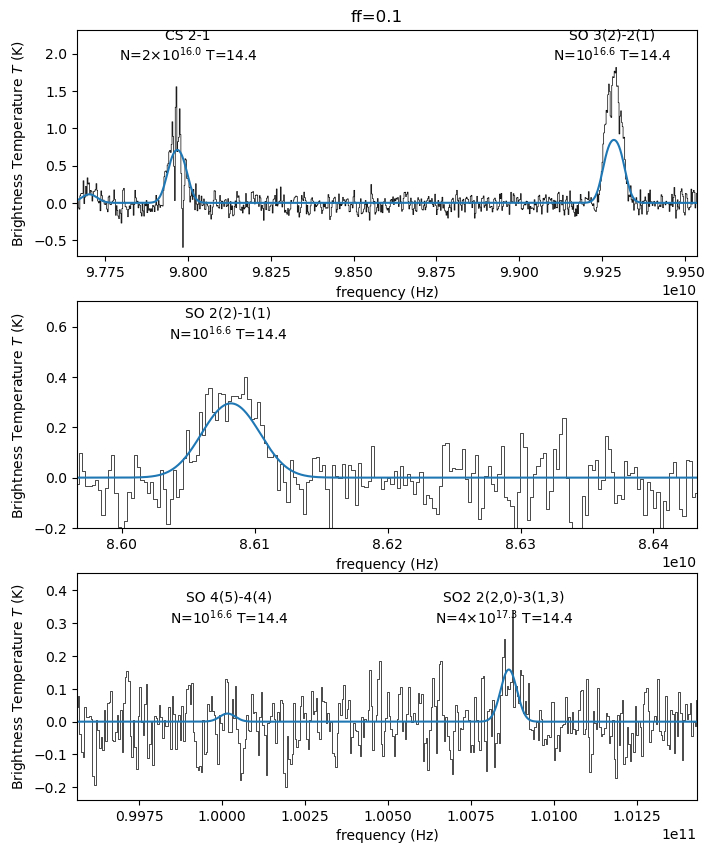

In [734]:
tex = 14.4 * u.K
ff = 0.1
column_SO = 10**15.6*u.cm**-2 / ff
column_SO2 = 2e16*u.cm**-2 / ff
column_34SO = 5e15/16*u.cm**-2 / ff
column_CS = 1e15*u.cm**-2 / ff

sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             ) * ff
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) * ff
pl.figure(figsize=(8, 10))
spw33sm.plotter(axis=pl.subplot(3,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 1.9, f"CS 2-1\nN=2$\\times10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 1.9, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter(axis=pl.subplot(3,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.08e9, 0.55, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter.axis.set_ylim(-0.2, 0.7)

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             ) * ff
spw35sm.plotter(axis=pl.subplot(3,1,3))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.3, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.3, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.suptitle(y=0.9, t=f"ff={ff}");

## CH3SH search in spw35

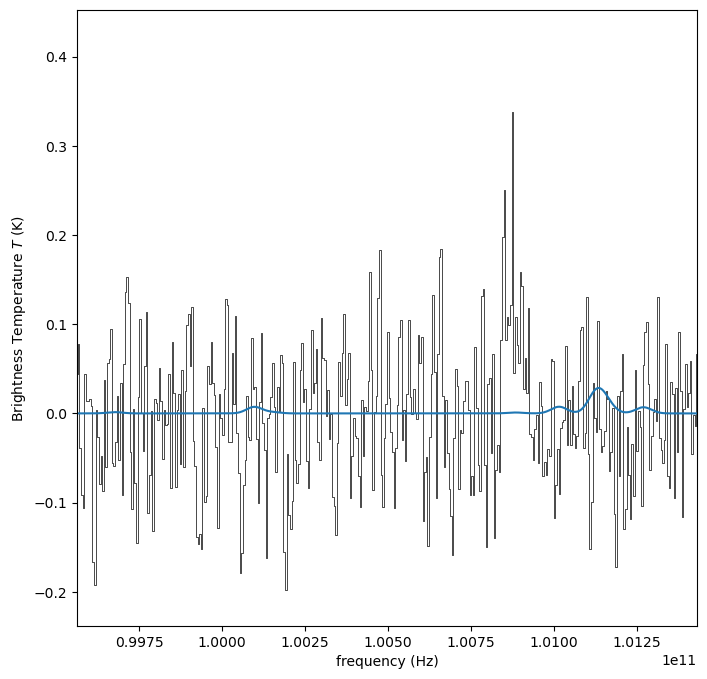

In [726]:
tex = 20 * u.K
column_CH3SH = 2e14*u.cm**-2
sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CH3SH,
                            freqs=freqs_CH3SH, aij=aij_CH3SH, deg=deg_CH3SH, EU=EU_CH3SH, partfunc=partfunc_CH3SH) 
             )
pl.figure(figsize=(8, 8))
spw35sm.plotter(axis=pl.subplot(1,1,1))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)

## Demonstrate temperature limits from SO

Text(0.5, 0.98, 'T=60K is inconsistent with the SO line ratio')

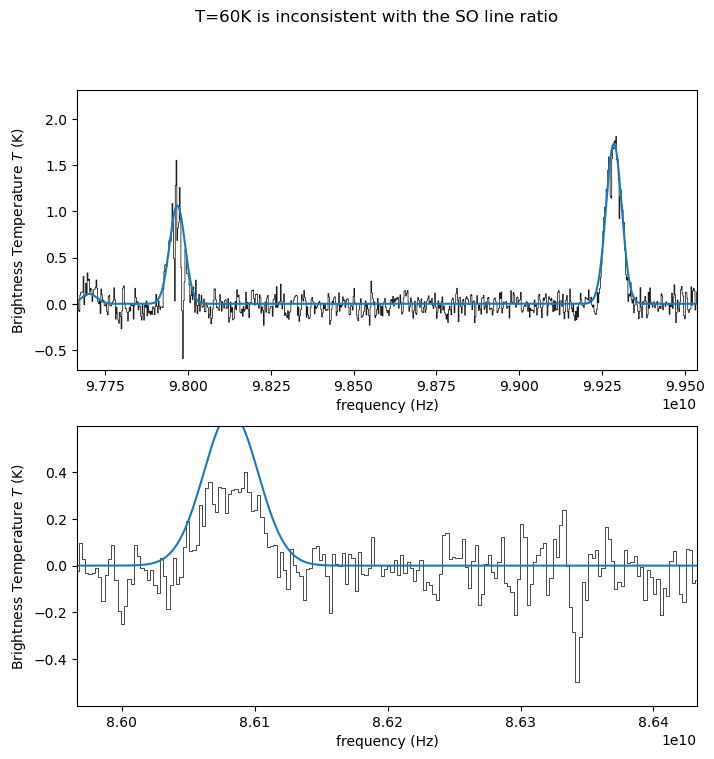

In [727]:
tex = 60 * u.K
column_SO = 1.4e16*u.cm**-2
column_CS = 2.5e15*u.cm**-2
column_34SO = column_SO/16
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 8))
spw33sm.plotter(axis=pl.subplot(2,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
spw25sm.plotter(axis=pl.subplot(2,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.suptitle("T=60K is inconsistent with the SO line ratio")

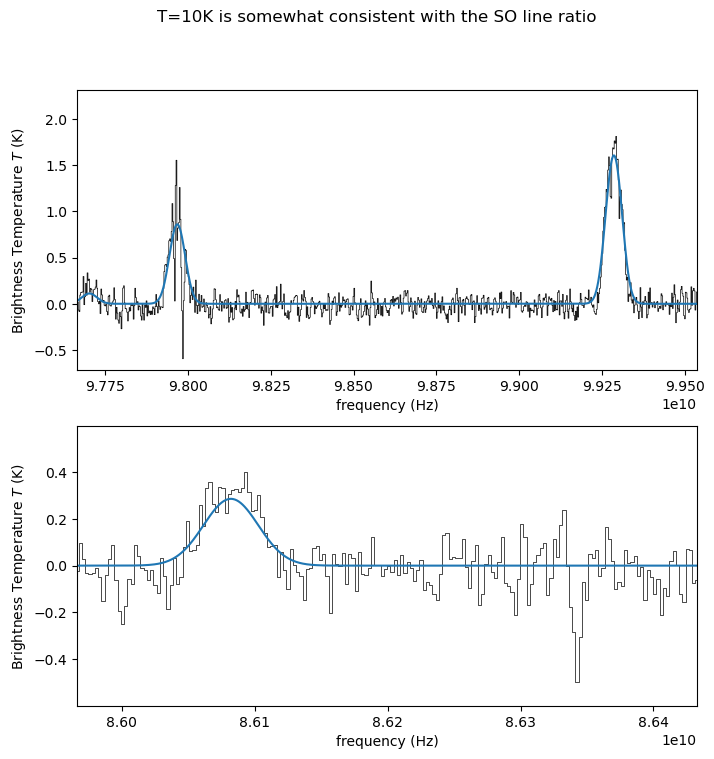

In [728]:
tex = 10 * u.K
column_SO = 50*8e13*u.cm**-2
column_CS = 50*1.5e13*u.cm**-2
column_34SO = column_SO/16
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 8))
spw33sm.plotter(axis=pl.subplot(2,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
spw25sm.plotter(axis=pl.subplot(2,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.suptitle("T=10K is somewhat consistent with the SO line ratio");

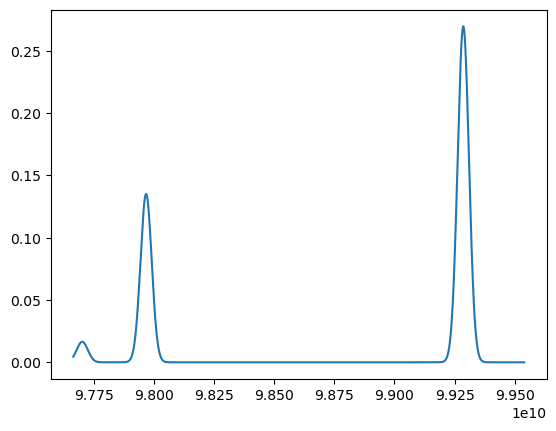

In [729]:
taus = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc, get_tau=True) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO, get_tau=True) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS, get_tau=True))
pl.plot(spw33.xarr, taus);

# splatalogue: check for a line at th ebottom of spw33?

In [706]:
Splatalogue.query_lines(97.7095 *u.GHz, 97.8 * u.GHz, energy_max=50, energy_type='eu_k',)['Species',
  'Chemical Name', 'Freq-GHz(rest frame,redshifted)', 'E_U (K)', 'Resolved QNs', ].pprint(max_lines=500)

      Species                   Chemical Name             Freq-GHz(rest frame,redshifted) E_U (K)            Resolved QNs         
------------------- ------------------------------------- ------------------------------- -------- -------------------------------
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 33.07617          13(4,10)-12(3,9),v=0-0
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 33.07804          13(4,10)-12(3,9),v=1-1
    CH3CHNH2COOH-II                       &alpha;-Alanine                      97.7109153 21.75558                 11(6,5)-10(4,6)
      CH3SD,vt&le;2                      Methyl mercaptan                      97.7117803 12.04928           4(0,4)--3(0,3)-E,vt=0
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 42.06122         16(1,15)-15(1,14),v=0-1
CH3O13CHO(TopModel)                        Methyl Formate                       97.

# Orbital velocity check
For a Keplerian orbit with width = 71 km/s, where could it be...?

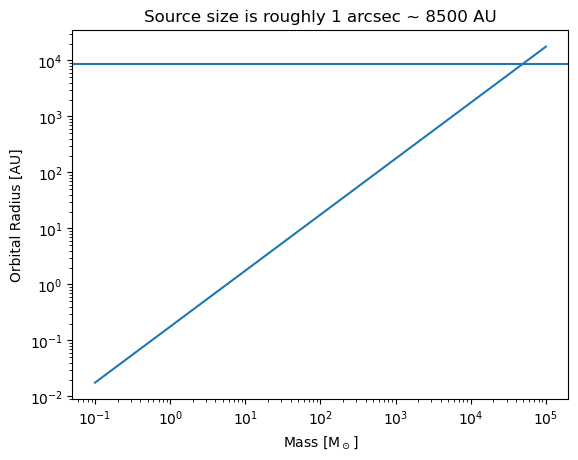

In [771]:
mass = np.geomspace(0.1, 1e5)*u.M_sun
pl.title("Source size is roughly 1 arcsec ~ 8500 AU")
pl.loglog(mass, (constants.G * mass / (71*u.km/u.s)**2).to(u.au))
pl.xlabel("Mass [M$_\odot$]")
pl.ylabel("Orbital Radius [AU]")
pl.axhline(8500);

# Overplot all the lines (to show nondetections)

In [708]:
import aces
linetb = Table.read(f'{aces.conf.basepath}/reduction_ACES/aces/data/tables/linelist.csv')
linetb.sort('col9')
spw_inds = {25: 0, 27:1, 29:2, 31:3, 33:4, 35: 5}
linetb[:3]

Band Name,TP SPW,7m SPW,12m SPW,Center,Bandwidth,F_Lower,F_Upper,F_Resolution,col9,Line,Rest (GHz),V_Lower,V_Upper,V_Res.,_1,References
str10,int64,int64,int64,float64,float64,float64,float64,float64,str3,str27,float64,float64,float64,float64,int64,str30
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,CH3SH 4(0)–3(0) E,101.13965,--,--,2.89,--,Jones et al. (2008)
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,CH3SH 4(0)–3(0) A,101.13916,--,--,2.89,--,Jones et al. (2008)
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,"NH2CN 5(1,4)-4(1,3)",100.6295,--,--,2.91,--,Jones et al. (2008)


In [818]:
all_spectra = {}
for row in linetb:
    if row['col9'] in ('**', '***') or 'SO' in row['Line'] or 'CCS' in row['Line']:
        scube = (scubes[spw_inds[row['12m SPW']]]
                 .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=row['Rest (GHz)']*u.GHz)
                 .spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
                 .to(u.K)
                )
        yy, xx = scube.wcs.celestial.world_to_pixel(coord)
        sp_ = scube[:, int(yy), int(xx)]
        sp = pyspeckit.Spectrum.from_hdu(sp_.hdu)
        smfac = (5*u.km/u.s / sp.xarr.cdelt()).decompose().value
        sp.smooth(smfac, downsample=True)
        all_spectra[row['Line']] = sp
        print(row['Line'], end=', ')

HN13C 1-0, 

H13CO+ 1-0, 

H40 Alpha, 

SiO 2-1, 

CH3C3N, 

H13CN 1-0, 

SiO 2-1 v=1 maser, 

SO 3(2)-2(1), 

HNCO 4-3, 

CS 2-1, 

HC3N 11-10, 

HCO+ 1-0, 

SO 4(5)-4(4), 

SO2 2(2,0)-3(1,3), 

SO 2(2)-1(1), 

CCS 7(6)-6(5), 

SO2 7(3,5)–8(2,6), 

34SO  3(2)–2(1), 

33SO, 

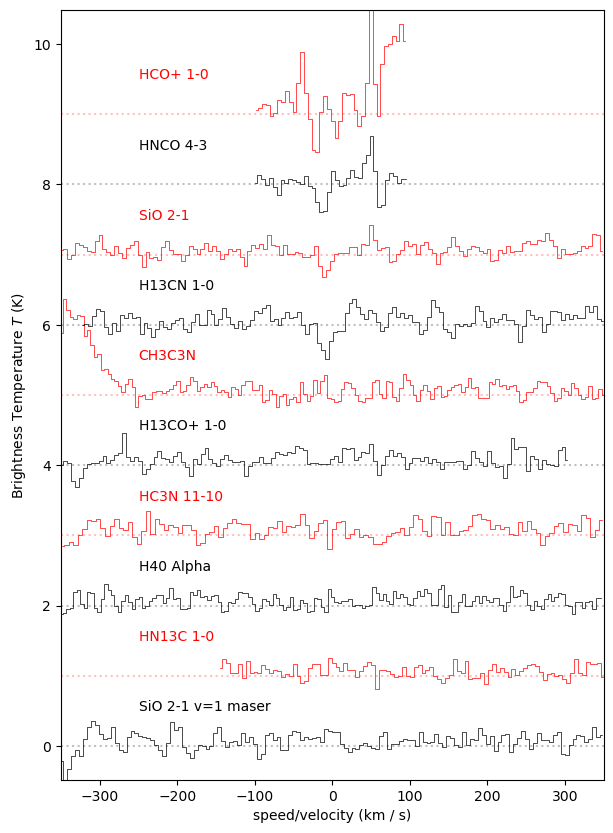

In [819]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra, key=lambda x: all_spectra[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
order = [k for k in order if not('CS' in k or 'SO' in k)]

for ii, linename in enumerate(order):
    sp = all_spectra[linename]
    offset = 1 * ii + 1*('CS' in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);

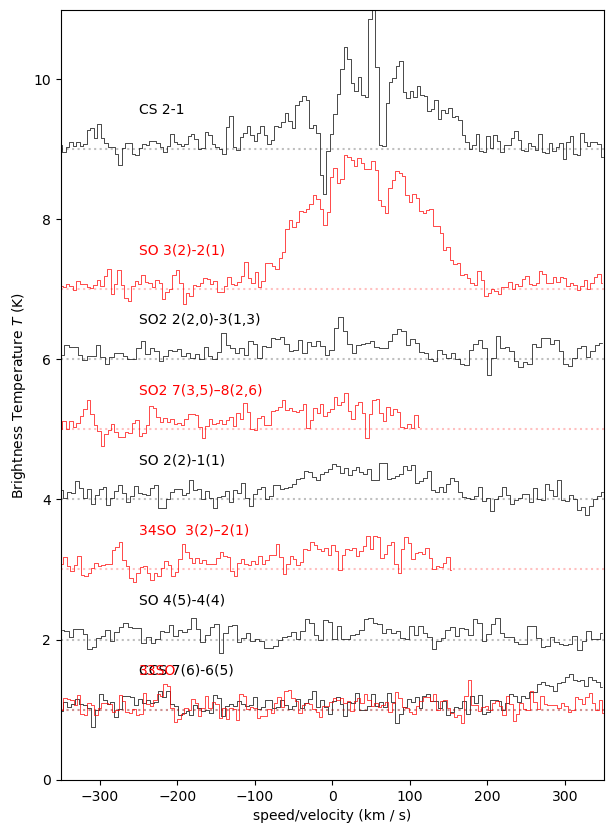

In [820]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra, key=lambda x: all_spectra[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
order = [k for k in order if 'CS' in k or 'SO' in k]

for ii, linename in enumerate(order):
    sp = all_spectra[linename]
    offset = 1 * ii + 1*('CS' in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);

# Search for other data

In [834]:
from astroquery.alma import Alma
from astroquery.alma.utils import parse_frequency_support
alma = Alma()

In [837]:
result = alma.query(payload=dict(project_code='2012.1.00080.S'), public=None)
frqsupp_201280 = parse_frequency_support(result['frequency_support'][0])
result['obs_id', 's_resolution', 'proposal_id', 'frequency',]# 'frequency_support']

obs_id,s_resolution,proposal_id,frequency
,arcsec,,GHz
str64,float64,str64,float64
uid://A002/X8981ca/X3.source.J2253+1608.spw.33,63.39784497492764,2012.1.00080.S,97.98187723143462
uid://A002/X8981ca/X3.source.J2253+1608.spw.35,63.39784497492764,2012.1.00080.S,97.02475325315575
uid://A002/X8981ca/X3.source.J2253+1608.spw.37,63.39784497492764,2012.1.00080.S,86.73265670946229
uid://A002/X8981ca/X3.source.J2253+1608.spw.39,63.39784497492764,2012.1.00080.S,85.71214713670295
uid://A002/X8981ca/X5.source.GC50MC.spw.19,63.39674430751842,2012.1.00080.S,96.54156911746472
uid://A002/X8981ca/X5.source.GC50MC.spw.17,63.39674430751842,2012.1.00080.S,97.9809529996788
uid://A002/X8981ca/X5.source.GC50MC.spw.23,63.39674430751842,2012.1.00080.S,85.7002703129451
uid://A002/X8981ca/X5.source.GC50MC.spw.21,63.39674430751842,2012.1.00080.S,86.79992736369624


In [845]:
for minfreq, maxfreq in frqsupp_201280:
    qSO = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Monoxide', line_lists=['CDMS']))
    qCS = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Carbon Monosulfide', line_lists=['CDMS']))
    print(qSO, qCS)

   Species      ChemicalName           QNs             Freq    log10_Aij    EU_K   
------------- --------------- --------------------- ---------- --------- ----------
         33SO Sulfur Monoxide 2(2)-1(1),  F=3/2-1/2 85.1935641  -5.67331   19.27296
         33SO Sulfur Monoxide 2(2)-1(1),  F=5/2-3/2 85.2037348  -5.44795   19.27201
         33SO Sulfur Monoxide 2(2)-1(1),  F=1/2-1/2 85.2068493  -5.37221   19.27359
         33SO Sulfur Monoxide 2(2)-1(1),  F=3/2-3/2 85.2240081  -5.56585   19.27298
         33SO Sulfur Monoxide 2(2)-1(1),  F=1/2-3/2 85.2372933  -6.07086   19.27362
         33SO Sulfur Monoxide 2(2)-1(1),  F=7/2-5/2 85.2379288  -5.29282   19.27091
         33SO Sulfur Monoxide 2(2)-1(1),  F=5/2-5/2 85.2624029  -5.81555   19.27209
         33SO Sulfur Monoxide 2(2)-1(1),  F=3/2-5/2 85.2826761  -6.59336   19.27306
SO3&Sigma;v=1 Sulfur Monoxide             2(2)-1(1)  85.406277  -5.29026 1618.56186
SO3&Sigma;v=0 Sulfur Monoxide             2(2)-1(1)   86.09395  -5.27985   1

In [838]:
result = alma.query(payload=dict(project_code='2017.1.01185.S'), public=None)
frqsupp_20171185 = parse_frequency_support(result['frequency_support'][0])
result['obs_id', 's_resolution', 'proposal_id', 'frequency',]# 'frequency_support']

obs_id,s_resolution,proposal_id,frequency
,arcsec,,GHz
str64,float64,str64,float64
uid://A001/X12a3/X109.source.Sgr_B2.spw.18,3.2306945280161865,2017.1.01185.S,356.98775417652155
uid://A001/X12a3/X109.source.Sgr_B2.spw.20,3.2306945280161865,2017.1.01185.S,343.23823271447424
uid://A001/X12a3/X109.source.Sgr_B2.spw.16,3.2306945280161865,2017.1.01185.S,355.0399819516899
uid://A001/X12a3/X109.source.Sgr_B2.spw.22,3.2306945280161865,2017.1.01185.S,344.99735558062855
uid://A001/X12a3/X101.source.50_kms.spw.18,3.302244777701615,2017.1.01185.S,356.9878759775914
uid://A001/X12a3/X101.source.50_kms.spw.20,3.302244777701615,2017.1.01185.S,343.23834669405403
uid://A001/X12a3/X101.source.50_kms.spw.16,3.302244777701615,2017.1.01185.S,355.04010365765464
uid://A001/X12a3/X101.source.50_kms.spw.22,3.302244777701615,2017.1.01185.S,344.9974662600166


In [850]:
for ii,(minfreq, maxfreq) in enumerate(frqsupp_20171185):
    qSO = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Monoxide', line_lists=['CDMS']))
    qSO2 = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Dioxide', line_lists=['CDMS']))
    qCS = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Carbon Monosulfide', line_lists=['CDMS']))
    print(ii)
    print(qSO, "\n", qSO2, "\n", qCS)

0
   Species      ChemicalName            QNs               Freq    log10_Aij    EU_K   
------------- --------------- ----------------------- ----------- --------- ----------
         33SO Sulfur Monoxide 9(8)-8(7),  F=19/2-19/2 343.0325429  -5.03799   78.03339
         33SO Sulfur Monoxide 9(8)-8(7),  F=17/2-17/2 343.0417838  -4.86883   78.03125
         33SO Sulfur Monoxide 9(8)-8(7),  F=15/2-15/2 343.0492171  -4.94137   78.02945
         33SO Sulfur Monoxide 9(8)-8(7),  F=15/2-13/2 343.0861019  -3.29162   78.02935
         33SO Sulfur Monoxide 9(8)-8(7),  F=17/2-15/2 343.0872979  -3.29337   78.03127
         33SO Sulfur Monoxide 9(8)-8(7),  F=19/2-17/2  343.088078  -3.28962   78.03347
         33SO Sulfur Monoxide 9(8)-8(7),  F=21/2-19/2 343.0882949  -3.28191   78.03607
SO3&Sigma;v=1 Sulfur Monoxide               9(8)-8(7) 343.8294217  -3.27923 1677.40774
         34SO Sulfur Monoxide               2(3)-2(1) 343.8511297  -6.85945   20.90551 
 Species   ChemicalName                Q

In [824]:
result = alma.query_region(coord, radius=5*u.arcsec, public=None)
result['obs_id', 's_resolution', 'proposal_id', 'frequency', 'frequency_support']

obs_id,s_resolution,proposal_id,frequency,frequency_support
,arcsec,,GHz,GHz
str64,float64,str64,float64,str4000
uid://A001/X12a3/X101.source.50_kms.spw.18,3.302244777701615,2017.1.01185.S,356.9878759775914,"[342.24..344.24GHz,1128.91kHz,119.5mJy/beam@10km/s,9mJy/beam@native, XX YY] U [344.00..346.00GHz,1128.91kHz,110.7mJy/beam@10km/s,8.4mJy/beam@native, XX YY] U [354.04..356.04GHz,1128.91kHz,124.5mJy/beam@10km/s,9.6mJy/beam@native, XX YY] U [355.99..357.99GHz,1128.91kHz,141mJy/beam@10km/s,10.9mJy/beam@native, XX YY]"
uid://A001/X12a3/X101.source.50_kms.spw.20,3.302244777701615,2017.1.01185.S,343.23834669405403,"[342.24..344.24GHz,1128.91kHz,119.5mJy/beam@10km/s,9mJy/beam@native, XX YY] U [344.00..346.00GHz,1128.91kHz,110.7mJy/beam@10km/s,8.4mJy/beam@native, XX YY] U [354.04..356.04GHz,1128.91kHz,124.5mJy/beam@10km/s,9.6mJy/beam@native, XX YY] U [355.99..357.99GHz,1128.91kHz,141mJy/beam@10km/s,10.9mJy/beam@native, XX YY]"
uid://A001/X12a3/X101.source.50_kms.spw.22,3.302244777701615,2017.1.01185.S,344.9974662600166,"[342.24..344.24GHz,1128.91kHz,119.5mJy/beam@10km/s,9mJy/beam@native, XX YY] U [344.00..346.00GHz,1128.91kHz,110.7mJy/beam@10km/s,8.4mJy/beam@native, XX YY] U [354.04..356.04GHz,1128.91kHz,124.5mJy/beam@10km/s,9.6mJy/beam@native, XX YY] U [355.99..357.99GHz,1128.91kHz,141mJy/beam@10km/s,10.9mJy/beam@native, XX YY]"
uid://A001/X12a3/X101.source.50_kms.spw.16,3.302244777701615,2017.1.01185.S,355.04010365765464,"[342.24..344.24GHz,1128.91kHz,119.5mJy/beam@10km/s,9mJy/beam@native, XX YY] U [344.00..346.00GHz,1128.91kHz,110.7mJy/beam@10km/s,8.4mJy/beam@native, XX YY] U [354.04..356.04GHz,1128.91kHz,124.5mJy/beam@10km/s,9.6mJy/beam@native, XX YY] U [355.99..357.99GHz,1128.91kHz,141mJy/beam@10km/s,10.9mJy/beam@native, XX YY]"
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.16,12.377595331115598,2021.1.00172.L,86.19995010029461,"[85.95..86.45GHz,488.28kHz,48.6mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [86.65..87.15GHz,488.28kHz,48.3mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [87.89..87.96GHz,61.04kHz,48mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [89.16..89.22GHz,61.04kHz,47.7mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [97.60..99.60GHz,976.56kHz,46.5mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [99.50..101.50GHz,976.56kHz,46.6mJy/beam@10km/s,1.9mJy/beam@native, XX YY]"
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.22,12.377595331115598,2021.1.00172.L,87.92520743221294,"[85.95..86.45GHz,488.28kHz,48.6mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [86.65..87.15GHz,488.28kHz,48.3mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [87.89..87.96GHz,61.04kHz,48mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [89.16..89.22GHz,61.04kHz,47.7mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [97.60..99.60GHz,976.56kHz,46.5mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [99.50..101.50GHz,976.56kHz,46.6mJy/beam@10km/s,1.9mJy/beam@native, XX YY]"
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.18,12.377595331115598,2021.1.00172.L,86.89921089741469,"[85.95..86.45GHz,488.28kHz,48.6mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [86.65..87.15GHz,488.28kHz,48.3mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [87.89..87.96GHz,61.04kHz,48mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [89.16..89.22GHz,61.04kHz,47.7mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [97.60..99.60GHz,976.56kHz,46.5mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [99.50..101.50GHz,976.56kHz,46.6mJy/beam@10km/s,1.9mJy/beam@native, XX YY]"
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.20,12.377595331115598,2021.1.00172.L,89.18871114209297,"[85.95..86.45GHz,488.28kHz,48.6mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [86.65..87.15GHz,488.28kHz,48.3mJy/beam@10km/s,3.7mJy/beam@native, XX YY] U [87.89..87.96GHz,61.04kHz,48mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [89.16..89.22GHz,61.04kHz,47.7mJy/beam@10km/s,10.4mJy/beam@native, XX YY] U [97.60..99.60GHz,976.56kHz,46.5mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [99.50..101.50GHz,976.56kHz,46.6mJy/beam@10km/s,1.9mJy/beam@native, XX YY]"


# Continuum Analysis

Betsy's 2017.1.01185.S gives a flux of 86 mJy at 350.1 GHz

We measure 1.5 mJy at 95 GHz

In [808]:
np.log(86/1.5)/np.log(350.1/95)

3.1041570275998556

Spectral index is 3.1: this is a dust source.